Convolutional neural networks 

This work is based on the MNIST dataset, in which each image is indexed by a number between 0 and 9.

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor() # convert data to torch.FloatTensor

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

Create data loaders for training, validation and test sets.

In [2]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

Documentation of Data loaders: https://pytorch.org/docs/stable/data.html

In [3]:
#Let's define how many samples per batch to load
batch_size = 20
#Percentage of training set to use as a validation set
valid_size = 0.2

def create_data_loaders(batch_size, valid_size, train_data, test_data):
    indices = list(range(len(train_data)))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size*len(train_data)))
    train_index, valid_index = indices[:split], indices[split:]
    train_sampler = SubsetRandomSampler(train_index)
    valid_sampler = SubsetRandomSampler(valid_index)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = train_sampler)
    valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = valid_sampler)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
    return train_loader, valid_loader, test_loader


In [5]:
train_loader, valid_loader, test_loader = create_data_loaders(20, 0.2, train_data, test_data)

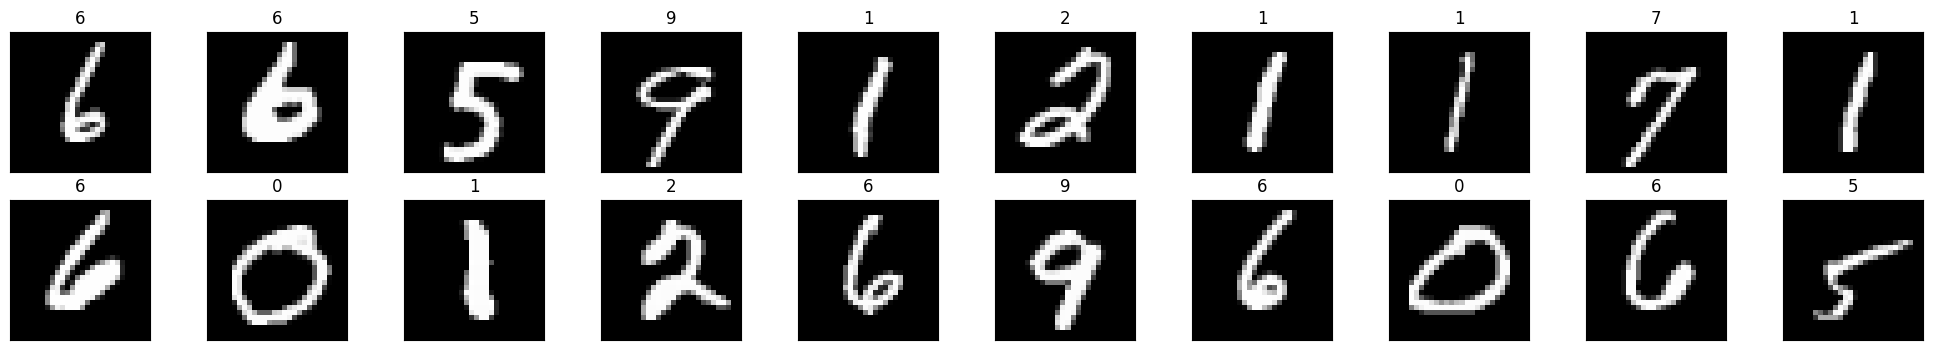

In [11]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

data_iter = iter(train_loader)
images, labels = next(data_iter)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))


References: 

-nn.Conv2D: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

-max-pooling layer using nn.MaxPool2D: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

-nn.Linear: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html



In [13]:
import torch.nn as nn 
import torch.nn.functional as F

class Net1(nn.Module):

    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Conv2d(1, 32, kernel_size = (3,3), stride= 1)
        self.fc2 = nn.Conv2d(32, 32, kernel_size = (3,3), stride = 1)
        self.fc3 = nn.MaxPool2d((2, 2))
        self.fc4 = nn.Linear(32 * 12 * 12, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = x.view(-1,32*12*12)
        out = self.fc4(x)
        return out